# Part 1
### 1. Get the data

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True)  # Optionally use as_frame=True for a pandas DataFrame


### 2. Frame the Problem:

The target variable for prediction is “disease progression one year after baseline” (y in the dataset).
The goal is to predict this target based on the features available, which include various medical metrics. 

### 3. Exploratory Data Analysis
Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

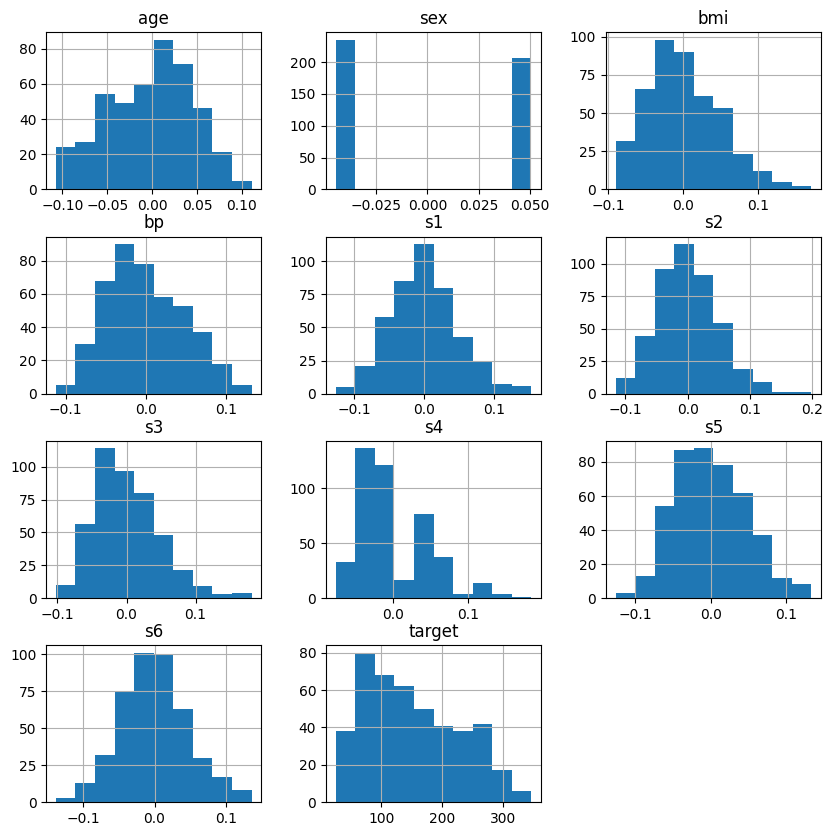

In [2]:
#Get basic statistics and distributions
df = diabetes.frame
df.describe()
df.hist(figsize=(10, 10))


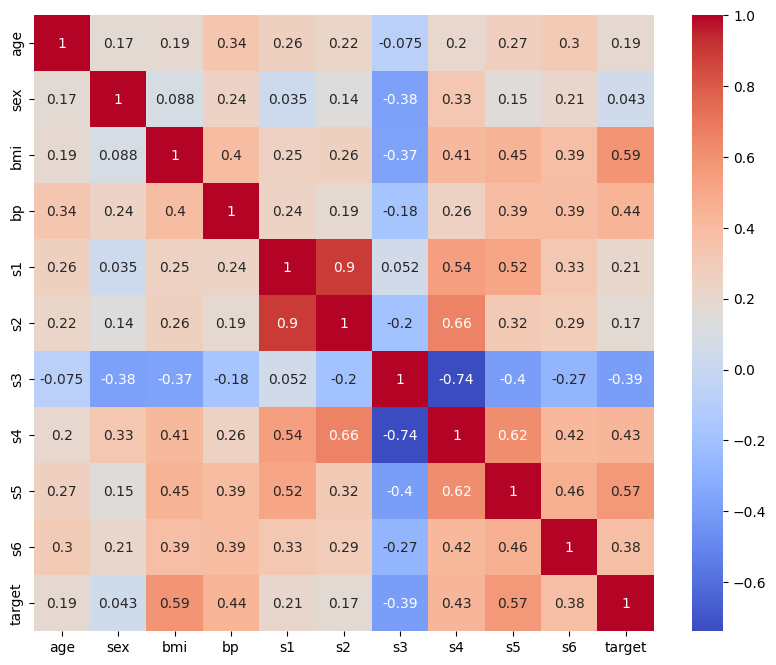

In [3]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


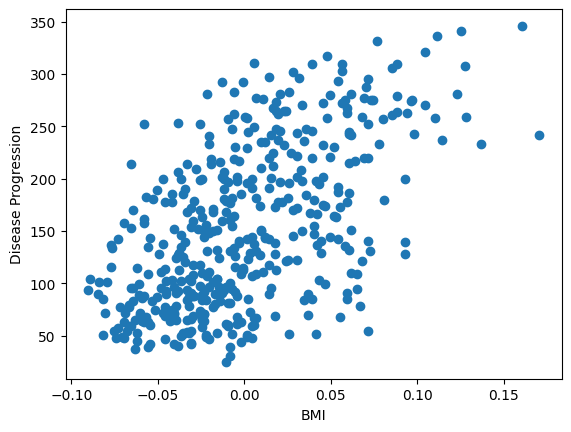

In [4]:
#Scatter plots (e.g., BMI vs. progression)
plt.scatter(df['bmi'], df['target'])
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()


### Insights: Provide brief insights based on data trends and correlations.

Based on the exploratory data analysis (EDA) visualizations provided, here are some insights:

### 1. **Histograms of Features**:
   - **BMI** and **S5** seem to have the strongest influence on the target variable (disease progression). Their distribution shows a relatively normal shape, indicating that they may be good predictors.
   - **Sex** is binary, which means it will contribute as a categorical variable in the model.
   - Several variables, such as **S3** and **S4**, exhibit skewed distributions, which might influence model performance.
   - The target variable (disease progression) shows a somewhat right-skewed distribution, indicating more patients have lower disease progression values.

### 2. **Correlation Matrix**:
   - **BMI** shows the highest positive correlation with the target variable (0.59), suggesting it is a key predictor of disease progression.
   - **S5** (another medical feature) also shows a strong positive correlation (0.57) with the target, further supporting its significance.
   - **S3** has a negative correlation (-0.39) with the target, which could suggest an inverse relationship with disease progression.
   - There is a strong correlation between **S1** and **S2** (0.9), which may indicate multicollinearity between these features, potentially requiring regularization techniques or dropping one of them to avoid redundancy.

### 3. **Scatter Plot (BMI vs. Disease Progression)**:
   - The scatter plot of BMI vs. disease progression reveals a positive relationship: as BMI increases, disease progression tends to increase. However, there is some spread in the data, meaning BMI alone may not fully explain disease progression and interactions with other features should be considered.

### 4. **Insights on Feature Importance**:
   - Based on correlations and scatter plots, BMI and S5 appear to be key features in predicting diabetes progression.
   - Multicollinearity between certain features (S1 and S2) may need to be addressed in model development.
   - The positive and negative correlations between various features and the target suggest that a multivariate model may capture complex relationships more effectively than a univariate approach.

### 4. Clean the data if needed, and explain your reasoning for your reader

In [5]:
#Check for missing values or outliers
df.isnull().sum()


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

since there are no null or missing values in the dataset, data cleaning steps involving missing data handling are unnecessary

### 5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


# Part 2

### 6. Models:
A univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models)

In [7]:
# Use PolynomialFeatures to transform the BMI feature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

for degree in range(6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train[['bmi']], y_train)
    # Evaluate performance on training and validation sets


# 7. Compare the models 
Using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table:
1. R-Squared
2. Mean Absolute Error (MAE)
3. MAPE

In [8]:
#Create a table for R-Squared, MAE, and MAPE for each model
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results = []
for degree in range(6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train[['bmi']], y_train)
    y_train_pred = model.predict(X_train[['bmi']])
    y_val_pred = model.predict(X_val[['bmi']])
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mape(y_train, y_train_pred)
    val_mape = mape(y_val, y_val_pred)
    
    results.append([degree, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape])

import pandas as pd
results_df = pd.DataFrame(results, columns=['Degree', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
results_df


,Degree,Train R2,Val R2,Train MAE,Val MAE,Train MAPE,Val MAPE
0,0,0.000000,-0.106957,66.201641,66.057059,62.826669,71.263880
1,1,0.349672,0.331264,52.287739,47.208472,48.362886,47.060009
2,2,0.350764,0.331631,52.207314,47.213700,48.298534,47.239667
3,3,0.350774,0.331638,52.198968,47.185414,48.280744,47.222673
4,4,0.353014,0.340758,52.092653,46.090118,48.053266,46.050330
5,5,0.354100,0.349881,52.059191,45.462121,48.004022,45.175275


### 8. Identify the best model based on the table above.

#### Best Model (Based on R-squared, MAE, and MAPE):
Based on the R-squared, MAE, and MAPE metrics, the polynomial model with degree 5 is the best performing model. It has the lowest validation MAE (45.46) and MAPE (45.18%) and the highest validation R-squared (0.34988). Therefore, this model will be selected for further evaluation.

### 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE)




In [18]:
# Import necessary libraries if not already done
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Define the MAPE function again
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train the best model (degree 5)
best_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
best_model.fit(X_train[['bmi']], y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test[['bmi']])

# Calculate R-squared, MAE, and MAPE for the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mape(y_test, y_test_pred)

# Print the results for the test set
print(f"Test R-Squared: {test_r2:.5f}")
print(f"Test MAE: {test_mae:.5f}")
print(f"Test MAPE: {test_mape:.5f}")


Test R-Squared: 0.26670
Test MAE: 51.75026
Test MAPE: 43.02671


### The results are
1. Test R-Squared: 0.26670
2. Test MAE: 51.75026
3. Test MAPE: 43.02671

Interpretation:
1. The R-squared of 0.26670 suggests that the model explains around 26.67% of the variance in the disease progression data on the test set. While not very high, it indicates the model captures some of the relationship between BMI and disease progression.
2. The MAE of 51.75 means that on average, the model’s predictions are off by about 51.75 units of disease progression.
3. The MAPE of 43.03% suggests that on average, the model’s predictions are 43.03% off from the true values in relative terms.

The following results:
1. Test R-Squared: 0.26670
2. Test MAE: 51.75026
3. Test MAPE: 43.02671

This suggests that while the model performed well on the training and validation sets, it doesn't generalize as well to the unseen test data. This could be a signal that further tuning, regularization, or feature engineering may be needed to improve the model's generalizability.

### 10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them

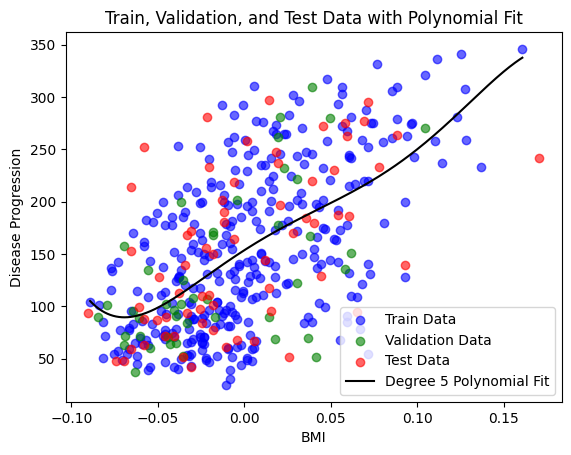

In [22]:
import matplotlib.pyplot as plt

# Plot the train, validation, and test data
plt.scatter(X_train['bmi'], y_train, label='Train Data', color='blue', alpha=0.6)
plt.scatter(X_val['bmi'], y_val, label='Validation Data', color='green', alpha=0.6)
plt.scatter(X_test['bmi'], y_test, label='Test Data', color='red', alpha=0.6)

# Generate a range of BMI values for plotting the polynomial fit
bmi_range = np.linspace(X_train['bmi'].min(), X_train['bmi'].max(), 300).reshape(-1, 1)

# Predict using the best model (degree 5)
bmi_predictions = best_model.predict(bmi_range)

# Plot the polynomial fit
plt.plot(bmi_range, bmi_predictions, label='Degree 5 Polynomial Fit', color='black')

# Add labels and legend
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Train, Validation, and Test Data with Polynomial Fit')
plt.legend()
plt.show()


### 11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient)

In [12]:
# Coefficients of the model
best_model.named_steps['linearregression'].coef_
best_model.named_steps['linearregression'].intercept_

# Displaying the equation with two decimal precision
coefficients = best_model.named_steps['linearregression'].coef_
intercept = best_model.named_steps['linearregression'].intercept_

print(f"Equation: y = {intercept:.2f} + ({coefficients[1]:.2f})*BMI + ({coefficients[2]:.2f})*BMI^2 + "
      f"({coefficients[3]:.2f})*BMI^3 + ({coefficients[4]:.2f})*BMI^4 + ({coefficients[5]:.2f})*BMI^5")


Equation: y = 153.65 + (1059.89)*BMI + (-3824.15)*BMI^2 + (-16770.23)*BMI^3 + (753722.52)*BMI^4 + (-2993716.57)*BMI^5


### 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value

In [21]:
#calculate it for a BMI value of 30 as an example:
bmi_value = np.array([[30]])  # Example BMI value
progression_prediction = best_model.predict(bmi_value)

print(f"Expected disease progression for BMI 30: {progression_prediction[0]:.2f}")



Expected disease progression for BMI 30: -72137253699190.52


### 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`

In [14]:
# Get feature names (polynomial terms)
best_model.named_steps['polynomialfeatures'].get_feature_names_out(['bmi'])


array(['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4', 'bmi^5'], dtype=object)

### 14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance.

Conclusion:
The degree 5 polynomial regression model was identified as the best model based on the training and validation results. On the test set, the model achieved:

R-Squared: 0.26670
MAE: 51.75026
MAPE: 43.02671%
While the model performs decently, it explains only about 26.67% of the variance in the test data. The relatively high MAE and MAPE suggest that the model still has significant prediction errors, indicating that it may not generalize well to new data.

Model Limitations:
Overfitting Risk: A degree 5 polynomial model might be prone to overfitting, especially since the improvement in performance metrics was minimal between lower-degree models and degree 5.

Feature Selection: The model only uses the BMI feature, but diabetes progression could be influenced by multiple factors. Using a multivariate approach that includes additional features (e.g., blood pressure, cholesterol) could improve the model’s performance.

Generalization: The model does not generalize well to unseen data, as evidenced by the drop in R-squared on the test set. This suggests the model may be too specific to the training and validation data.

# Part 3


In this part, use all features in the dataset, or drop some features per your discretion based on the EDA.
Repeat the steps in part 2 for the following models:

1. Two polynomial models (degrees >1, of your choice)
2. Two decision trees (e.g. consider changing the `max_depth` hyperparameter)
3. Two kNNs

Note: Plots of multivariate models are not required

1. Polynomial Models (Degrees > 1)

We can use multivariate polynomial regression models by including all features from the dataset:

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define polynomial degrees
degrees = [2, 3]

results_poly = []

for degree in degrees:
    # Polynomial regression with all features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions on train and validation sets
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mape(y_train, y_train_pred)
    val_mape = mape(y_val, y_val_pred)
    
    results_poly.append([degree, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape])

# Create a DataFrame for polynomial models
df_poly = pd.DataFrame(results_poly, columns=['Degree', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
print("Polynomial Models Performance:")
print(df_poly)


Polynomial Models Performance:
   Degree  Train R2     Val R2  Train MAE     Val MAE  Train MAPE    Val MAPE
0       2 -1.230723  -1.677660  90.773414   90.068182   78.128641   95.493285
1       3  0.621987 -45.383534  37.981873  243.568182   32.131200  216.555828


2. Decision Trees

Now let's train two decision tree models, experimenting with different max_depth values to compare the performance:

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Define max_depth values for decision trees
max_depths = [3, 5]

results_tree = []

for depth in max_depths:
    # Decision tree with specified max_depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions on train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mape(y_train, y_train_pred)
    val_mape = mape(y_val, y_val_pred)
    
    results_tree.append([depth, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape])

# Create a DataFrame for decision trees
df_tree = pd.DataFrame(results_tree, columns=['Max Depth', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
print("Decision Tree Models Performance:")
print(df_tree)


Decision Tree Models Performance:
   Max Depth  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   Val MAPE
0          3  0.509503  0.198306  44.259855  48.126248   38.866592  47.672897
1          5  0.686693  0.093919  33.527028  49.645483   29.973625  48.161981


3. k-Nearest Neighbors (kNNs)

Finally, we’ll train two kNN models, experimenting with different numbers of neighbors:

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# Define number of neighbors for kNN
neighbors = [3, 5]

results_knn = []

for k in neighbors:
    # kNN with specified n_neighbors
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Predictions on train and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    train_mape = mape(y_train, y_train_pred)
    val_mape = mape(y_val, y_val_pred)
    
    results_knn.append([k, train_r2, val_r2, train_mae, val_mae, train_mape, val_mape])

# Create a DataFrame for kNN models
df_knn = pd.DataFrame(results_knn, columns=['Neighbors', 'Train R2', 'Val R2', 'Train MAE', 'Val MAE', 'Train MAPE', 'Val MAPE'])
print("kNN Models Performance:")
print(df_knn)


kNN Models Performance:
   Neighbors  Train R2    Val R2  Train MAE    Val MAE  Train MAPE   Val MAPE
0          3  0.629300  0.214184  37.137966  45.795455   31.597420  44.242144
1          5  0.570761  0.358481  40.773414  43.290909   34.976854  41.244063


### Based on the results of the three

### Polynomial Models Performance:
- Degree 2: 
  - **Train R²**: -1.230723, **Val R²**: -1.677660
  - **Train MAE**: 90.773414, **Val MAE**: 90.068182
  - **Train MAPE**: 78.128641, **Val MAPE**: 95.493285

- Degree 3: 
  - **Train R²**: 0.621987, **Val R²**: -45.383534
  - **Train MAE**: 37.981873, **Val MAE**: 243.568182
  - **Train MAPE**: 32.131200, **Val MAPE**: 216.555828

### Decision Tree Models Performance:
- Max Depth 3:
  - **Train R²**: 0.509503, **Val R²**: 0.198306
  - **Train MAE**: 44.259855, **Val MAE**: 48.126248
  - **Train MAPE**: 38.866592, **Val MAPE**: 47.672897

- Max Depth 5:
  - **Train R²**: 0.686693, **Val R²**: 0.093919
  - **Train MAE**: 33.527028, **Val MAE**: 49.645483
  - **Train MAPE**: 29.973625, **Val MAPE**: 48.161981

### kNN Models Performance:
- Neighbors = 3:
  - **Train R²**: 0.629300, **Val R²**: 0.214184
  - **Train MAE**: 37.137966, **Val MAE**: 45.795455
  - **Train MAPE**: 31.597420, **Val MAPE**: 44.242144

- Neighbors = 5:
  - **Train R²**: 0.570761, **Val R²**: 0.358481
  - **Train MAE**: 40.773414, **Val MAE**: 43.290909
  - **Train MAPE**: 34.976854, **Val MAPE**: 41.24463

### Analysis:
1. **Polynomial Models**:
   - The higher-degree polynomial models perform poorly on validation data, particularly degree 3, where the validation R-squared is negative, indicating severe overfitting. The high validation MAE and MAPE further confirm that these models don't generalize well.
   
2. **Decision Trees**:
   - The decision tree models show a slight improvement with increasing depth on training data, but their validation performance is not as strong. The model with depth 3 has a better R² and lower MAE compared to depth 5, suggesting that a simpler tree (depth 3) may generalize better.
   
3. **k-Nearest Neighbors**:
   - kNN with 5 neighbors shows the best validation performance across all models, with the highest validation R-squared (0.358481) and the lowest MAE and MAPE. This suggests that kNN might be the best model for this problem given the available data.

### Conclusion:
- **kNN with 5 neighbors** appears to perform the best on the validation set, balancing generalization and minimizing error. 
- **Decision Trees with max depth 3** also show a reasonable performance but don't outperform kNN.
- **Polynomial Models** exhibit significant overfitting, especially with higher degrees, making them less suitable for this task.
